## Préparation et modélisation des données

In [2]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np

# Lecture du dataframe 
df = pd.read_csv("winequality-red.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Visualisation des données

In [80]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


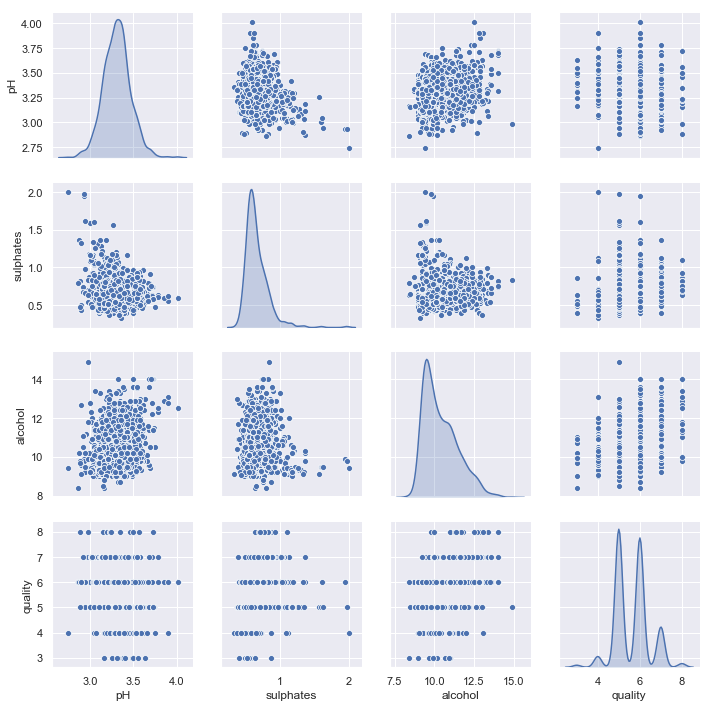

In [85]:
sns.pairplot(df.iloc[:,8:13], diag_kind='kde');

## Séparation des données

In [4]:
target = df.quality
data = df.drop(['quality'], axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

### Distribution variable quality

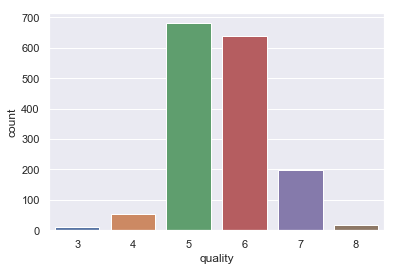

In [84]:
import seaborn as sns
sns.set()
sns.countplot(x='quality', data=df);

On se rend compte que la distribution de la variable quality est fortement concentrée entre les valeur 5 et 6 et à moindre mesure 7 et 4.

### Classification supervisée par arbre de décision

In [7]:
dtc = DecisionTreeClassifier(max_depth = 3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Evaluation du modèle

In [10]:
y_pred = dtc.predict(X_test)

# score 
print("score dtc: ", dtc.score(X_test, y_test))

# f1-score
print(f1_score(y_test, y_pred, average='micro'))
      
# matrice de confusion
pd.crosstab(y_test, y_pred, rownames=['valeur réelle'], colnames=['valeur prédite'])

score dtc:  0.559375
0.559375


valeur prédite,5,6,7
valeur réelle,,,
3,2,2,0
4,1,9,0
5,74,69,1
6,15,98,4
7,1,33,7
8,0,3,1


Le modèle de classification par arbre de décision ne prédit que les valeurs de 5 à 7, l'échantillon n'étant pas assez représentatif sur les autres valeurs.
-  4 valeurs pour 3
- 10 pour 4
- 4 pour 8

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        10
          5       0.80      0.51      0.62       144
          6       0.46      0.84      0.59       117
          7       0.54      0.17      0.26        41
          8       0.00      0.00      0.00         4

avg / total       0.59      0.56      0.53       320



C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Bagging

In [14]:
dtc_u = DecisionTreeClassifier(max_depth=3)
bc = BaggingClassifier(base_estimator = dtc_u, n_estimators = 400, 
                       max_samples = 0.5, max_features=0.7)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

# Scores
print(" Score modèle - bagging: ", bc.score(X_test, y_test))
print(" f1-score - bagging: ", f1_score(y_test, y_pred, average='micro'))

# Report
print("Classification report - Baging \n", classification_report(y_test, y_pred))

# matrice de confusion
pd.crosstab(y_test, y_pred, rownames=['valeur réelle'], colnames=['valeur prédite'])


 Score modèle - bagging:  0.596875
 f1-score - bagging:  0.596875
 Classification report - Baging 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        10
          5       0.69      0.78      0.73       144
          6       0.50      0.65      0.56       117
          7       0.75      0.07      0.13        41
          8       0.00      0.00      0.00         4

avg / total       0.59      0.60      0.55       320



C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


valeur prédite,5,6,7
valeur réelle,,,
3,3,1,0
4,4,6,0
5,112,32,0
6,41,76,0
7,3,35,3
8,0,3,1


Score légérement plus élevé, mais reste trop peu pertinent.

### Boosting

In [35]:
ac = AdaBoostClassifier(base_estimator = dtc_u, learning_rate=0.1,
                       n_estimators = 400)
ac.fit(X_train, y_train)
y_pred = ac.predict(X_test)

# Scores
print("Score modèle - boosting: ", ac.score(X_test, y_test))
print("F1-score - boosting: ",f1_score(y_test, y_pred, average='micro'))

print("Classification report - Boosting \n", classification_report(y_test, y_pred))

# matrice de confusion
pd.crosstab(y_test, y_pred, rownames=['valeur réelle'], colnames=['valeur prédite'])


Score modèle - boosting:  0.50625
F1-score - boosting:  0.50625
Classification report - Boosting 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.00      0.00      0.00        13
          5       0.55      0.60      0.57       128
          6       0.48      0.59      0.53       131
          7       0.57      0.20      0.30        40
          8       0.00      0.00      0.00         5

avg / total       0.49      0.51      0.48       320



C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


valeur prédite,4,5,6,7
valeur réelle,,,,
3,1,1,1,0
4,0,11,2,0
5,2,77,48,1
6,1,49,77,4
7,0,3,29,8
8,0,0,4,1


Le score n'est pas plus pertinent, mais on se rend compte que le modèle arrive à prédire sans grande précision la valeur 4 contrairement aux autres.

### Voting Classifier

In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Modele arbre de décision
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
score = f1_score(y_test, y_pred,average='micro')
print("F1- score - tree: ", score)

# Modele KNN
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score_knn = f1_score(y_test, y_pred, average='micro')
print("F1-score - knn: ",score_knn)

# Modele Gaussien
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
score_nb = f1_score(y_test, y_pred, average='micro')
print("F1-Score - Gaussian:" ,score_nb)

F1- score - tree:  0.540625
F1-score - knn:  0.496875
F1-Score - Gaussian: 0.496875


In [18]:
vc = VotingClassifier(estimators = [
    ('tree',tree), ('knn',knn), ('nb', nb)], voting='hard')
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

score_vc = f1_score(y_test, y_pred, average='micro')
print("F1-score Voting Classifier: ", score_vc)

F1-score Voting Classifier:  0.521875


C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


On se rend compte que la classication par vote n'est pas adaptée à nos données.

## Classification par régression logistique

In [37]:
from sklearn import linear_model, preprocessing
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
clf = linear_model.LogisticRegression(C=1.0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Scores
print("Score modèle - rl: ", clf.score(X_test, y_test))
print("F1-score - rl: ",f1_score(y_test, y_pred, average='micro'))

print("Classification report - rl: \n", classification_report(y_test, y_pred))

# matrice de confusion
pd.crosstab(y_test, y_pred, rownames=['valeur réelle'], colnames=['valeur prédite'])

probs = clf.predict_proba(X_test)
y_preds = np.where(probs[:,1]>0.4,1,0)
cm = confusion_matrix(y_test, y_preds)
cm

Score modèle - rl:  0.559375
F1-score - rl:  0.559375
Classification report - rl: 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        11
          5       0.58      0.75      0.65       135
          6       0.54      0.55      0.54       135
          7       0.57      0.12      0.20        34
          8       0.00      0.00      0.00         1

avg / total       0.53      0.56      0.52       320



C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  0,   0,   0,   0,   0,   0,   0],
       [  4,   0,   0,   0,   0,   0,   0],
       [ 11,   0,   0,   0,   0,   0,   0],
       [135,   0,   0,   0,   0,   0,   0],
       [135,   0,   0,   0,   0,   0,   0],
       [ 34,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0]], dtype=int64)

La régression logistique permet de prédire toutes les valeurs de la variable qualité même si la précision est encore relative.

### Courbe ROC

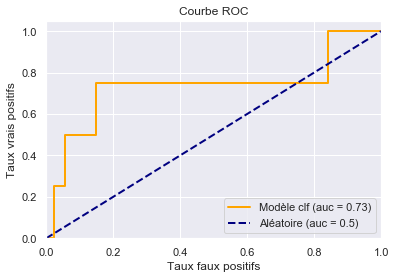

In [20]:
from sklearn.metrics import roc_curve, auc
probs = clf.predict_proba(X_test)
fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=3)
roc_auc = auc(fpr, tpr)

import matplotlib.pylab as plt

plt.plot(fpr, tpr, color='orange',
         lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show();

### Classification SVM

In [33]:
import pandas as pd
import numpy as np
from sklearn import svm, model_selection, preprocessing
from sklearn.model_selection import train_test_split

X_train_scaled = preprocessing.scale(X_train)
print("mean : ", X_train_scaled.mean(axis=0))
print("std", X_train_scaled.std(axis=0))

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("mean : ", X_test_scaled.mean(axis=0))
print("std", X_test_scaled.std(axis=0))

clf = svm.SVC(kernel='poly', gamma=0.01)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

# Scores
print("Score modèle - svm: ", clf.score(X_test, y_test))
print("F1-score - svm: ",f1_score(y_test, y_pred, average='micro'))

print("Classification report - svm: \n", classification_report(y_test, y_pred))


# Matrice confusion
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

mean :  [ 8.77761941e-16 -3.49993685e-16 -1.99996392e-16  5.27768256e-17
  1.54858317e-16  1.31942064e-17 -3.61104596e-17  3.77270971e-14
 -9.37483086e-16 -4.24992332e-16 -9.44427405e-17]
std [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean :  [-6.91359044e-02 -5.49260504e-05 -1.01524745e-01 -7.15546601e-02
 -1.99789467e-02  4.77570209e-02 -9.30978722e-03  4.19327724e-02
  1.71699859e-01  8.86232167e-02 -2.93297802e-02]
std [0.98454502 0.90362166 0.96430591 0.79321225 0.81089934 1.01075026
 0.91348144 0.99384982 1.02449405 1.03763848 0.99536099]
Score modèle - svm:  0.109375
F1-score - svm:  0.40625
Classification report - svm: 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        12
          5       0.41      1.00      0.58       130
          6       0.00      0.00      0.00       137
          7       0.00      0.00      0.00        34
          8       0.00      0.00      0.00         5

C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classe prédite,5
Classe réelle,
3,2
4,12
5,130
6,137
7,34
8,5


In [23]:
parametres = {
    'C':[0.1,1,10],
    'kernel':['rbf','linear', 'poly'], 
    'gamma':[0.001, 0.1, 0.5]}

grid_clf = model_selection.GridSearchCV(estimator=clf, param_grid=parametres)
grille = grid_clf.fit(X_train_scaled, y_train)
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,["params","mean_test_score"]]) 

                                            params  mean_test_score
0      {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}         0.422205
1   {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}         0.584050
2     {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}         0.422205
3        {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}         0.581704
4     {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}         0.584050
5       {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}         0.556685
6        {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}         0.508210
7     {'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}         0.584050
8       {'C': 0.1, 'gamma': 0.5, 'kernel': 'poly'}         0.592651
9        {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}         0.560594
10    {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}         0.584050
11      {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}         0.422205
12         {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}         0.626271
13      {'C': 1, 'gamma': 0.1, 'kernel': 'linear

C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\

In [24]:
grid_clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [32]:
clf = svm.SVC(kernel='rbf', gamma=0.1)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

# Scores
print("Score modèle - svm (rbf): ", clf.score(X_test, y_test))
print("F1-score - svm(rbf): ",f1_score(y_test, y_pred, average='micro'))

print("Classification report - svm (rbf): \n", classification_report(y_test, y_pred))


# Matrice confusion
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Score modèle - svm (rbf):  0.428125
F1-score - svm(rbf):  0.390625
Classification report - svm (rbf): 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        12
          5       0.38      0.55      0.45       130
          6       0.40      0.39      0.40       137
          7       0.00      0.00      0.00        34
          8       0.00      0.00      0.00         5

avg / total       0.33      0.39      0.35       320



C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classe prédite,5,6
Classe réelle,,
3,2,0
4,6,6
5,72,58
6,84,53
7,22,12
8,3,2


#### Courbe d'apprentissage du model

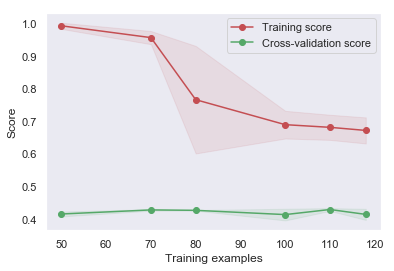

In [28]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline 

train_sizes, train_scores, valid_scores = learning_curve(svm.SVC(kernel='linear', C= 1), data, target, train_sizes=[50, 80, 110, 140], cv=5)

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes=[50, 70, 80, 100, 110, 118]

train_sizes, train_scores, test_scores = learning_curve(
    grid_clf, data, target, n_jobs=4, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best");

### Classification KNN 

#### Metric minkowski

In [31]:
from sklearn import neighbors, datasets
knn_1 = neighbors.KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
knn_1.fit(X_train, y_train)

y_pred = knn_1.predict(X_test)

# Scores
print("Score modèle - knn minkowski: ", knn_1.score(X_test, y_test))
print("F1-score - knn minkowski: ",f1_score(y_test, y_pred, average='micro'))

print("Classification report - knn minkowski: \n", classification_report(y_test, y_pred))

pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Score modèle - knn minkowski:  0.5
F1-score - knn minkowski:  0.5
Classification report - knn minkowski: 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.25      0.08      0.12        12
          5       0.52      0.68      0.59       130
          6       0.51      0.45      0.48       137
          7       0.38      0.26      0.31        34
          8       0.00      0.00      0.00         5

avg / total       0.48      0.50      0.48       320



C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classe prédite,4,5,6,7,8
Classe réelle,,,,,
3,0,2,0,0,0
4,1,5,6,0,0
5,3,89,35,3,0
6,0,64,61,11,1
7,0,10,15,9,0
8,0,2,2,1,0


#### Metric Manhattan

In [38]:
knn_m = neighbors.KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_m.fit(X_train, y_train)

y_pred = knn_m.predict(X_test)

# Scores
print("Score modèle - knn manhattan: ", knn_m.score(X_test, y_test))
print("F1-score - knn manhattan: ",f1_score(y_test, y_pred, average='micro'))

print("Classification report - knn manhattan: \n", classification_report(y_test, y_pred))

pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Score modèle - knn manhattan:  0.49375
F1-score - knn manhattan:  0.49375
Classification report - knn manhattan: 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        11
          5       0.53      0.66      0.59       135
          6       0.55      0.43      0.48       135
          7       0.35      0.32      0.34        34
          8       0.00      0.00      0.00         1

avg / total       0.49      0.49      0.49       320



C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classe prédite,4,5,6,7,8
Classe réelle,,,,,
3,1,3,0,0,0
4,0,7,4,0,0
5,6,89,34,5,1
6,7,55,58,14,1
7,0,13,10,11,0
8,0,0,0,1,0


#### Comparatisons entre les matrices Manhattan et Chebyshev et variations du nombre de voisins

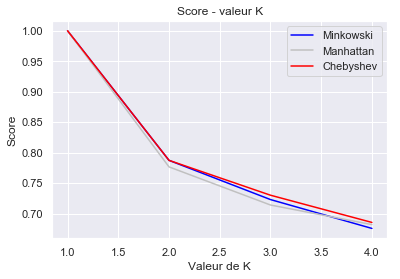

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)
score_minko = []
score_man = []
score_cheb = []

for k in np.arange(1,5,1):
    knn_minko = neighbors.KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn_minko.fit(X_train, y_train)
    score_minko.append(knn_minko.score(X_train, y_train))
    
    knn_man = neighbors.KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_man.fit(X_train, y_train)
    score_man.append(knn_man.score(X_train, y_train))
    
    knn_cheb = neighbors.KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn_cheb.fit(X_train, y_train)
    score_cheb.append(knn_cheb.score(X_train, y_train))
    
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(range(1,5), score_minko, color='blue', label = "Minkowski")
plt.plot(range(1,5), score_man, color='silver', label = "Manhattan")
plt.plot(range(1,5), score_cheb, color='red', label = "Chebyshev")
plt.title("Score - valeur K")
plt.xlabel('Valeur de K')
plt.ylabel('Score')
plt.legend();

La distance de Chebyshev donne de meilleures performance quand le k est petit (<5)
Il parait donc judicieux de choisr k=2 avec la disctance de Chebtshev pour avoir la meilleure performance.


#### Metric Chebyshev

In [66]:
knn_c =  neighbors.KNeighborsClassifier(n_neighbors=2, metric='chebyshev')
knn_c.fit(X_train, y_train)

y_pred = knn_c.predict(X_test)

# Scores
print("Score modèle - knn cheb: ", knn_c.score(X_train, y_train))
print("F1-score - knn cheb: ",f1_score(y_test, y_pred, average='micro'))

print("Classification report - knn cheb: \n", classification_report(y_test, y_pred))

pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Score modèle - knn cheb:  0.774798927613941
F1-score - knn cheb:  0.5520833333333334
Classification report - knn cheb: 
              precision    recall  f1-score   support

          3       0.50      0.25      0.33         4
          4       0.07      0.18      0.10        11
          5       0.58      0.80      0.67       202
          6       0.57      0.42      0.49       193
          7       0.67      0.28      0.40        64
          8       0.00      0.00      0.00         6

avg / total       0.57      0.55      0.54       480



C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classe prédite,3,4,5,6,7
Classe réelle,,,,,
3,1,0,2,1,0
4,0,2,6,3,0
5,1,12,162,27,0
6,0,12,90,82,9
7,0,3,17,26,18
8,0,0,2,4,0


### Random forest

In [69]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
import pandas as pd

clf = ensemble.RandomForestClassifier(n_jobs = -1, random_state=321)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Scores
print("Score modèle - rfc: ", knn_c.score(X_test, y_test))
print("F1-score - rfc: ",f1_score(y_test, y_pred, average='micro'))

print("Classification report - rfc: \n", classification_report(y_test, y_pred))

pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Score modèle - rfc:  0.70625
F1-score - rfc:  0.6395833333333333
Classification report - rfc: 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00        15
          5       0.67      0.83      0.74       202
          6       0.65      0.60      0.62       195
          7       0.51      0.38      0.44        58
          8       0.00      0.00      0.00         5

avg / total       0.61      0.64      0.62       480



C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classe prédite,4,5,6,7,8
Classe réelle,,,,,
3,2,2,1,0,0
4,0,12,3,0,0
5,1,168,30,3,0
6,0,62,117,14,2
7,0,7,29,22,0
8,0,0,1,4,0


In [75]:
y_proba = clf.predict_proba(X_test)
print(y_proba)
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test, y_proba, figsize= (12,8))
plt.show()

[[0.  0.  0.8 0.1 0.1 0. ]
 [0.  0.  0.6 0.4 0.  0. ]
 [0.  0.  0.1 0.9 0.  0. ]
 ...
 [0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.9 0.  0.1 0. ]
 [0.  0.1 0.6 0.3 0.  0. ]]


ModuleNotFoundError: No module named 'scikitplot'

### Apprentissage semi-supervisée

In [76]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from scipy.sparse.csgraph import connected_components
import pandas as pd

In [77]:
label_model = LabelSpreading(n_neighbors=7, kernel='knn', max_iter=10, gamma = 0.20)
label_model.fit(X_train, y_train)

LabelSpreading(alpha=0.2, gamma=0.2, kernel='knn', max_iter=10, n_jobs=1,
        n_neighbors=7, tol=0.001)

In [78]:
y_pred = label_model.predict(X_test)
pd.crosstab(y_test, y_pred, rownames =["Valeurs réelles"], colnames= ["Valeurs prédites"])

Valeurs prédites,5,6,7,8
Valeurs réelles,,,,
3,3,2,0,0
4,9,6,0,0
5,131,66,5,0
6,77,102,15,1
7,19,26,13,0
8,2,1,2,0


In [79]:
# K de cohen
cohen_kappa_score(y_test, y_pred)

0.19827549286927726